In [1]:
import pandas as pd

Pour atteindre nos objectifs nous allons suivre les etapes suivantes:
1. [Chargement des données](#load)
2. [Nettoyage des données](#clean)
3. [Visualisation et analyse des données](#visual)
4. [Exploration des techniques de regroupement des données](#explore)

<div id="load"><h1>1. Chargement des données</h1></div>

In [2]:
# placer le fichier excel dans le meme repertoire que le notebook ou sinon modifier le path
df = pd.read_csv('Dataset - Ads _ Levallois-Perret - 2019-08 - export-ads-levallois-perret-2019-08-27.csv')

In [3]:
df.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,...,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,...,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,...,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,...,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,...,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,...,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14


In [4]:
df.shape

(2164, 57)

<div id="clean"><h1>2. Nettoyage des données</h1></div>

#### Conversion de type

In [5]:
df.dtypes

ID                             object
URL                            object
CRAWL_SOURCE                   object
PROPERTY_TYPE                  object
NEW_BUILD                      object
DESCRIPTION                    object
IMAGES                         object
SURFACE                       float64
LAND_SURFACE                  float64
BALCONY_SURFACE               float64
TERRACE_SURFACE               float64
ROOM_COUNT                    float64
BEDROOM_COUNT                 float64
BATHROOM_COUNT                float64
LUNCHROOM_COUNT               float64
TOILET_COUNT                  float64
FURNISHED                      object
FIREPLACE                     float64
AIR_CONDITIONING              float64
GARDEN                        float64
SWIMMING_POOL                 float64
BALCONY                       float64
TERRACE                       float64
CELLAR                        float64
PARKING                          bool
PARKING_COUNT                 float64
HEATING_TYPE

In [6]:
# Conversion des types datetime
DATETYPE_COLUMNS = ['PUBLICATION_START_DATE', 'LAST_CRAWL_DATE', 'LAST_PRICE_DECREASE_DATE']
df[DATETYPE_COLUMNS].dtypes

PUBLICATION_START_DATE      object
LAST_CRAWL_DATE             object
LAST_PRICE_DECREASE_DATE    object
dtype: object

In [7]:
for column in DATETYPE_COLUMNS:
    df[column] = pd.to_datetime(df[column], errors='coerce')

In [8]:
df[DATETYPE_COLUMNS].dtypes

PUBLICATION_START_DATE      datetime64[ns]
LAST_CRAWL_DATE             datetime64[ns]
LAST_PRICE_DECREASE_DATE    datetime64[ns]
dtype: object

In [9]:
# Colonnes booleennes
suspected_bool_columns = ['NEW_BUILD', 'FURNISHED', 'ELEVATOR', 'CARETAKER', 'RENTAL_EXPENSES_INCLUDED', 'FEES_INCLUDED', 'OCCUPIED']
unique_values = {col: df[col].unique() for col in suspected_bool_columns}

unique_values

{'NEW_BUILD': array([False, nan, True], dtype=object),
 'FURNISHED': array([False, nan, True], dtype=object),
 'ELEVATOR': array([True, nan, False], dtype=object),
 'CARETAKER': array([nan, False, True], dtype=object),
 'RENTAL_EXPENSES_INCLUDED': array([True, nan, False], dtype=object),
 'FEES_INCLUDED': array([nan, False, True], dtype=object),
 'OCCUPIED': array([nan, False, True], dtype=object)}

On peut voir que ces colonnes sont en effets booléennes avec des valeurs manquantes.
On peut soit remplacer les *NaN* 
- par *False* (si l'information n'est pas fournie dans ce cas on peut supposer ce qu'on veut par exemple qu'une propriété n'est pas meublée ou qu'il n'y a pas d'ascenseur)
- par une valeur par defaut: ex la valeur la plus frequente
- laisser comme tel

On va dans ce qui suit considerer la deuxieme option, remplacer les NaN par la valeur la plus fréquente.

Nous allons donc convevrtir en type boolean puis remplacer les NaN par la valeur la plus présente.

In [10]:
# Replace NaN valuas tu 
for col in suspected_bool_columns:
    most_frequent_value = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent_value).astype(bool)

# Check again for missing values in the suspected columns
missing_values_suspected = df[suspected_bool_columns].isnull().sum()

missing_values_suspected

NEW_BUILD                   0
FURNISHED                   0
ELEVATOR                    0
CARETAKER                   0
RENTAL_EXPENSES_INCLUDED    0
FEES_INCLUDED               0
OCCUPIED                    0
dtype: int64

In [11]:
unique_values = {col: df[col].unique() for col in suspected_bool_columns}

unique_values

{'NEW_BUILD': array([False,  True]),
 'FURNISHED': array([False,  True]),
 'ELEVATOR': array([ True, False]),
 'CARETAKER': array([ True, False]),
 'RENTAL_EXPENSES_INCLUDED': array([ True, False]),
 'FEES_INCLUDED': array([False,  True]),
 'OCCUPIED': array([False,  True])}

In [12]:
df.dtypes

ID                                    object
URL                                   object
CRAWL_SOURCE                          object
PROPERTY_TYPE                         object
NEW_BUILD                               bool
DESCRIPTION                           object
IMAGES                                object
SURFACE                              float64
LAND_SURFACE                         float64
BALCONY_SURFACE                      float64
TERRACE_SURFACE                      float64
ROOM_COUNT                           float64
BEDROOM_COUNT                        float64
BATHROOM_COUNT                       float64
LUNCHROOM_COUNT                      float64
TOILET_COUNT                         float64
FURNISHED                               bool
FIREPLACE                            float64
AIR_CONDITIONING                     float64
GARDEN                               float64
SWIMMING_POOL                        float64
BALCONY                              float64
TERRACE   

#### Verifications doublons

In [13]:
# y'a t'il des lignes en doubles dans le dataset??
duplicate_rows = df[df.duplicated()]


len(duplicate_rows)

0

Il n'y a pas de doublons on a donc fini le projet ^^ .

---
Mais nous allons exploiter davantage le dataset pour voir si nous pouvons trouver d'autres critéres qui nous permettent de voir les doublons

#### Suppression de colonnes à valeurs manquantes

In [14]:
missing_val = df.isnull().sum()

In [15]:
missing_val[missing_val>0].sort_values(ascending=False)

FIREPLACE                     2164
LUNCHROOM_COUNT               2164
CELLAR                        2164
BALCONY                       2164
AIR_CONDITIONING              2164
ENERGY_CONSUMPTION            2164
TOILET_COUNT                  2164
GREENHOUSE_GAS_CONSUMPTION    2164
BATHROOM_COUNT                2164
PUBLICATION_END_DATE          2164
BALCONY_SURFACE               2164
LAND_SURFACE                  2161
SWIMMING_POOL                 2158
GARDEN                        2150
TERRACE_SURFACE               2139
DEPOSIT                       2109
TERRACE                       2078
FEES                          2070
PARKING_COUNT                 2007
AGENCIES_UNWANTED             1963
LAST_PRICE_DECREASE_DATE      1824
RENTAL_EXPENSES               1723
FLOOR_COUNT                   1699
CONSTRUCTION_YEAR             1661
HEATING_MODE                  1511
FLOOR                         1504
BEDROOM_COUNT                 1468
ROOM_COUNT                     329
PRICE_M2            

---
Comme on peut le constater plusieurs colonnes ont des valeurs manquantes. Il serait inutile de garder certaines informations sachant qu'elles n'apportent rien de concret.
Nous allons supprimer toutes colonnes qui a plus de <b><span style='color: green;font-size:16px;'>55%</span></b> de valeurs manquantes.

In [16]:
threshold = 0.55 * len(df)

In [17]:
print('Toute colonne avec plus de',threshold, 'valeurs manquantes sera automatiquement supprimé')

Toute colonne avec plus de 1190.2 valeurs manquantes sera automatiquement supprimé


In [18]:
print('Colonnes a supprimer: ', end='\n\n')
print(missing_val[missing_val>=threshold].sort_values(ascending=False))

Colonnes a supprimer: 

CELLAR                        2164
BALCONY                       2164
PUBLICATION_END_DATE          2164
GREENHOUSE_GAS_CONSUMPTION    2164
BATHROOM_COUNT                2164
LUNCHROOM_COUNT               2164
TOILET_COUNT                  2164
FIREPLACE                     2164
AIR_CONDITIONING              2164
ENERGY_CONSUMPTION            2164
BALCONY_SURFACE               2164
LAND_SURFACE                  2161
SWIMMING_POOL                 2158
GARDEN                        2150
TERRACE_SURFACE               2139
DEPOSIT                       2109
TERRACE                       2078
FEES                          2070
PARKING_COUNT                 2007
AGENCIES_UNWANTED             1963
LAST_PRICE_DECREASE_DATE      1824
RENTAL_EXPENSES               1723
FLOOR_COUNT                   1699
CONSTRUCTION_YEAR             1661
HEATING_MODE                  1511
FLOOR                         1504
BEDROOM_COUNT                 1468
dtype: int64


In [19]:
df_cleaned = df.drop(columns=missing_val[missing_val >= threshold].index)

In [20]:
print('taille avant suppression: ', df.shape, 'taille apres suppression: ', df_cleaned.shape)

taille avant suppression:  (2164, 57) taille apres suppression:  (2164, 30)


In [21]:
df_cleaned.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,FURNISHED,...,EXCLUSIVE_MANDATE,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,3.0,False,...,False,False,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22 04:07:56.095,2017-04-21 18:52:35.733
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,2.0,False,...,False,False,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18 11:04:44.461,2019-06-06 10:08:10.890
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,6.0,False,...,False,False,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19 16:49:03.547,2019-06-13 08:22:14.314
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,0.0,False,...,False,False,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06 15:18:59.805,2019-06-18 10:40:07.405
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,8.0,False,...,False,False,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08 17:12:20.123,2019-06-14 15:02:18.155


In [22]:
missing_val = df_cleaned.isnull().sum()
missing_val[missing_val>=0].sort_values(ascending=False)

ROOM_COUNT                  329
PRICE_M2                    173
SURFACE                     114
DEALER_NAME                  87
PRICE                        60
DESCRIPTION                   4
ZIP_CODE                      1
PUBLICATION_START_DATE        0
DEPT_CODE                     0
CITY                          0
PRICE_EVENTS                  0
CITY_ID                       0
DEALER_TYPE                   0
OCCUPIED                      0
EXCLUSIVE_MANDATE             0
FEES_INCLUDED                 0
RENTAL_EXPENSES_INCLUDED      0
ID                            0
URL                           0
MARKETING_TYPE                0
CARETAKER                     0
ELEVATOR                      0
HEATING_TYPES                 0
PARKING                       0
FURNISHED                     0
IMAGES                        0
NEW_BUILD                     0
PROPERTY_TYPE                 0
CRAWL_SOURCE                  0
LAST_CRAWL_DATE               0
dtype: int64

On a toujours des valeurs manquantes pour certaines colonnes.
Pour traiter ces valeurs manquantes, on peut adopter plusieurs strategies:

- ROOM_COUNT, SURFACE, PRICE, PRICE_M2: Ces colonnes sont quantitatives. On peut remplacer les valeurs manquantes par la médiane ou la moyenne. Une autre option serait de supprimer les lignes avec des valeurs manquantes si le nombre est faible.
- DEALER_NAME, DESCRIPTION: Ce sont des colonnes textuelles. Nous pouvons remplacer les valeurs manquantes par une chaîne de caractères comme "Inconnu" ou "Non fourni".
- ZIP_CODE: De ce qu'on peut voir tous les immeubles sont dans le 92300 donc on remplace par cette valeur.

In [23]:
# remplacer les valeurs manquantes par la mediane
quantitative_columns = ['ROOM_COUNT', 'SURFACE', 'PRICE', 'PRICE_M2']
for col in quantitative_columns:
    median_value = df_cleaned[col].median()
    df_cleaned[col].fillna(median_value, inplace=True)

In [24]:
# remplacer les valeurs manquantes par 'indefini'
textual_columns = ['DEALER_NAME', 'DESCRIPTION']
for col in textual_columns:
    df_cleaned[col].fillna('Indefini', inplace=True)

In [25]:
# remplacer les valeurs manquantes par le mode
mode_value = df['ZIP_CODE'].mode()[0]
df_cleaned['ZIP_CODE'].fillna(mode_value, inplace=True)

In [26]:
missing_val = df_cleaned.isnull().sum()
missing_val[missing_val>=0].sort_values(ascending=False)

ID                          0
URL                         0
PUBLICATION_START_DATE      0
DEPT_CODE                   0
ZIP_CODE                    0
CITY                        0
CITY_ID                     0
DEALER_TYPE                 0
DEALER_NAME                 0
OCCUPIED                    0
EXCLUSIVE_MANDATE           0
FEES_INCLUDED               0
RENTAL_EXPENSES_INCLUDED    0
PRICE_EVENTS                0
PRICE_M2                    0
PRICE                       0
MARKETING_TYPE              0
CARETAKER                   0
ELEVATOR                    0
HEATING_TYPES               0
PARKING                     0
FURNISHED                   0
ROOM_COUNT                  0
SURFACE                     0
IMAGES                      0
DESCRIPTION                 0
NEW_BUILD                   0
PROPERTY_TYPE               0
CRAWL_SOURCE                0
LAST_CRAWL_DATE             0
dtype: int64

In [27]:
df_cleaned.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,FURNISHED,...,EXCLUSIVE_MANDATE,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,LAST_CRAWL_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,3.0,False,...,False,False,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22 04:07:56.095,2017-04-21 18:52:35.733
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,2.0,False,...,False,False,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18 11:04:44.461,2019-06-06 10:08:10.890
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,6.0,False,...,False,False,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19 16:49:03.547,2019-06-13 08:22:14.314
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,0.0,False,...,False,False,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06 15:18:59.805,2019-06-18 10:40:07.405
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,8.0,False,...,False,False,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08 17:12:20.123,2019-06-14 15:02:18.155


#### Fusion de colonnes

In [28]:
LOCALIZATION_COLUMS = ['CITY', 'CITY_ID', 'ZIP_CODE', 'DEPT_CODE']
df_cleaned[LOCALIZATION_COLUMS].value_counts()

CITY              CITY_ID   ZIP_CODE  DEPT_CODE
Levallois-Perret  54178039  92300.0   92           2164
dtype: int64

Comme on peut le voir toutes les annonces sont faites à Levallois-Perret dans le 92. 

Nous allons les fusionner en une seule colonne LOCALIZATION = Levallois-Perret (92300)

In [29]:
df_cleaned['LOCALIZATION'] = df_cleaned['CITY'] + " (" + df_cleaned['ZIP_CODE'].astype(str).str.split('.').str[0] + ")"

In [30]:
df_cleaned.drop(columns=LOCALIZATION_COLUMS, inplace=True)

In [31]:
df_cleaned.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,FURNISHED,...,PRICE_EVENTS,RENTAL_EXPENSES_INCLUDED,FEES_INCLUDED,EXCLUSIVE_MANDATE,OCCUPIED,DEALER_NAME,DEALER_TYPE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LOCALIZATION
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,3.0,False,...,"[{""price"":1979,""date"":""2017-03-22""}]",True,False,False,False,Lamirand Et Associes,AGENCY,2017-03-22 04:07:56.095,2017-04-21 18:52:35.733,Levallois-Perret (92300)
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,2.0,False,...,"[{""price"":452000.0,""date"":""2018-09-18""},{""pric...",True,False,False,False,Proprietes Privees,MANDATARY,2018-09-18 11:04:44.461,2019-06-06 10:08:10.890,Levallois-Perret (92300)
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,6.0,False,...,"[{""price"":4970000.0,""date"":""2019-02-19""}]",True,False,False,False,Propriétés Parisiennes,AGENCY,2019-02-19 16:49:03.547,2019-06-13 08:22:14.314,Levallois-Perret (92300)
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,0.0,False,...,"[{""price"":89.0,""date"":""2018-07-06""}]",True,False,False,False,Iwg,AGENCY,2018-07-06 15:18:59.805,2019-06-18 10:40:07.405,Levallois-Perret (92300)
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,8.0,False,...,"[{""price"":3150000.0,""date"":""2019-04-08""},{""pri...",True,False,False,False,Daniel Feau Neuilly,AGENCY,2019-04-08 17:12:20.123,2019-06-14 15:02:18.155,Levallois-Perret (92300)


In [32]:
df_cleaned.shape

(2164, 27)

#### enregistrer le dataset nettoyé

In [33]:
file_path = "./cleaned_dataset_levallois_perret.csv"
df_cleaned.to_csv(file_path, index=False)

<div id="visual"><h1>3. Visualisation et analyse des données</h1></div>


Avant de pouvoir regrouper efficacement les annonces portant sur un même bien immobilier, il est utile de visualiser et d'analyser les données pour comprendre les caractéristiques qui pourraient aider à identifier les doublons. Cela pourrait inclure des caractéristiques telles que la surface, le nombre de pièces, l'emplacement, le prix, etc.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# style fond blanc 
sns.set_style("whitegrid")

df = pd.read_csv('cleaned_dataset_levallois_perret.csv')


#### Distribution de la surface des biens.

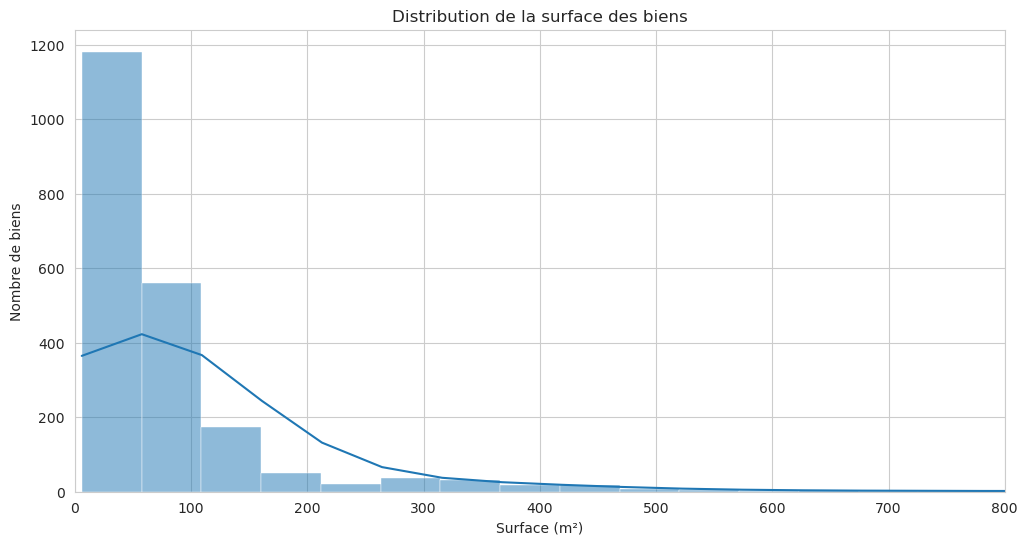

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df['SURFACE'], bins=200, kde=True)
plt.xlim([0, 800])
plt.title('Distribution de la surface des biens')
plt.xlabel('Surface (m²)')
plt.ylabel('Nombre de biens')
plt.show()

La distribution de la surface des biens montre que la majorité des biens à Levallois-Perret ont une surface comprise entre 0 et 200 m², avec un pic prononcé autour de 50 m².

#### Distribution du nombre de pièces

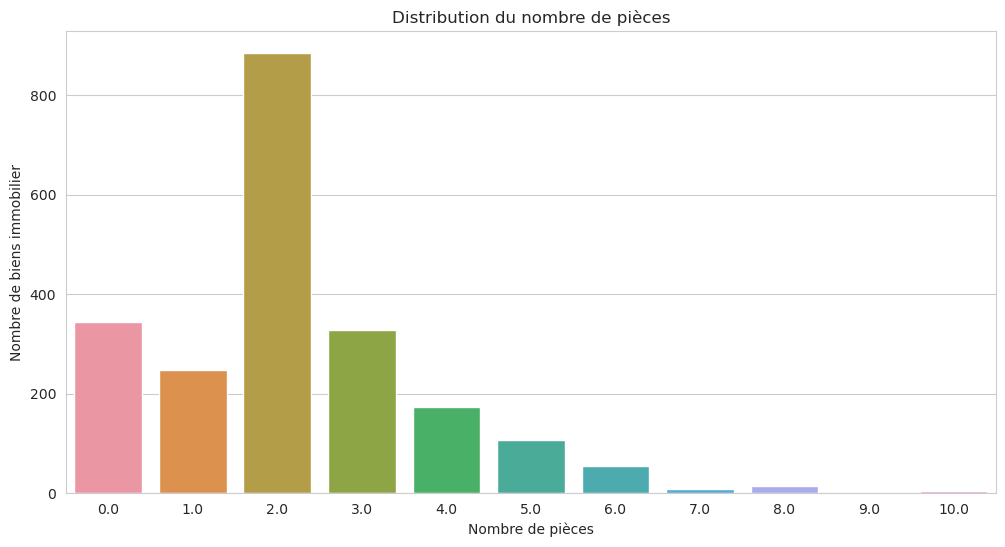

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ROOM_COUNT')
plt.title('Distribution du nombre de pièces')
plt.xlabel('Nombre de pièces')
plt.ylabel('Nombre de biens immobilier')
plt.show()

La distribution du nombre de pièces montre que la majorité des biens à Levallois-Perret ont entre 1 et 4 pièces, avec une prédominance des biens à 2 ou 3 pièces.

#### Distribution des prix

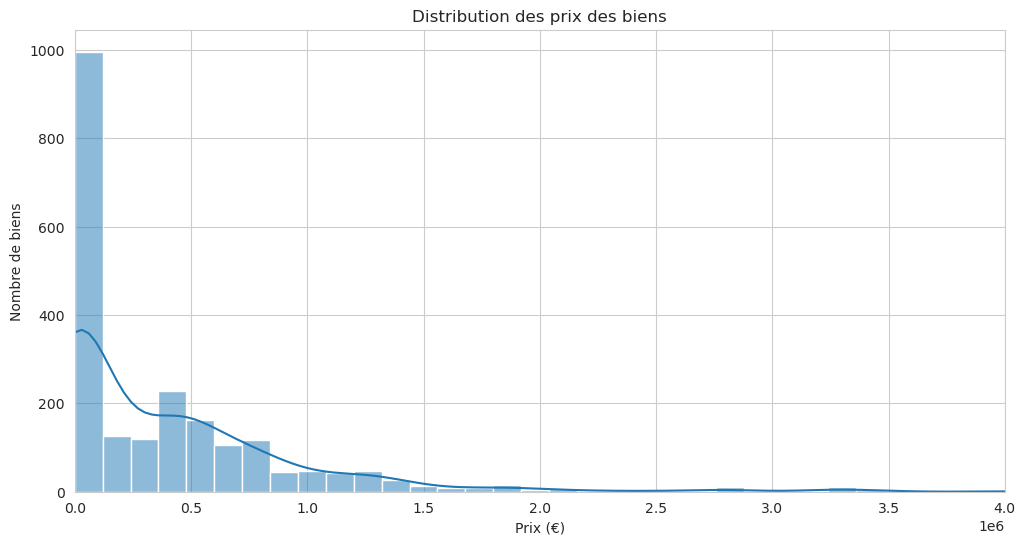

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE'], bins=50, kde=True)
plt.xlim([0, 4e6])
plt.title('Distribution des prix des biens')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre de biens')
plt.show()

La distribution des prix montre que la majorité des biens à Levallois-Perret ont un prix compris entre 0€ et 1 500 000€, avec un pic prononcé autour de 500 000€.

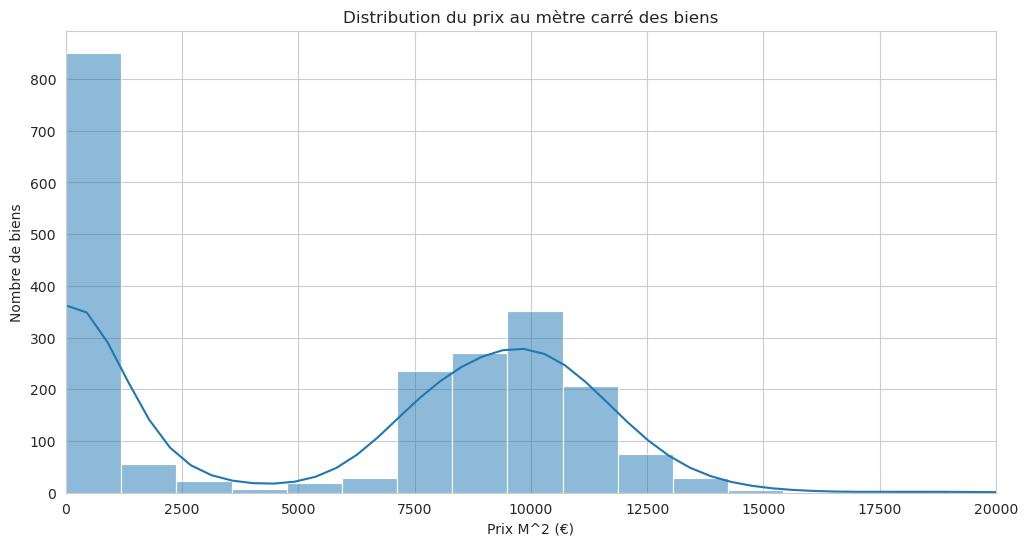

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE_M2'], bins=75, kde=True)
plt.xlim([0, 2e4])
plt.title('Distribution du prix au mètre carré des biens')
plt.xlabel('Prix M^2 (€)')
plt.ylabel('Nombre de biens')
plt.show()

Le prix au mètre carré varie le plus souvent entre 7500€ et 11000€ à Levallois-Perret

#### Repartition des types de biens (appartement, maison, etc.)

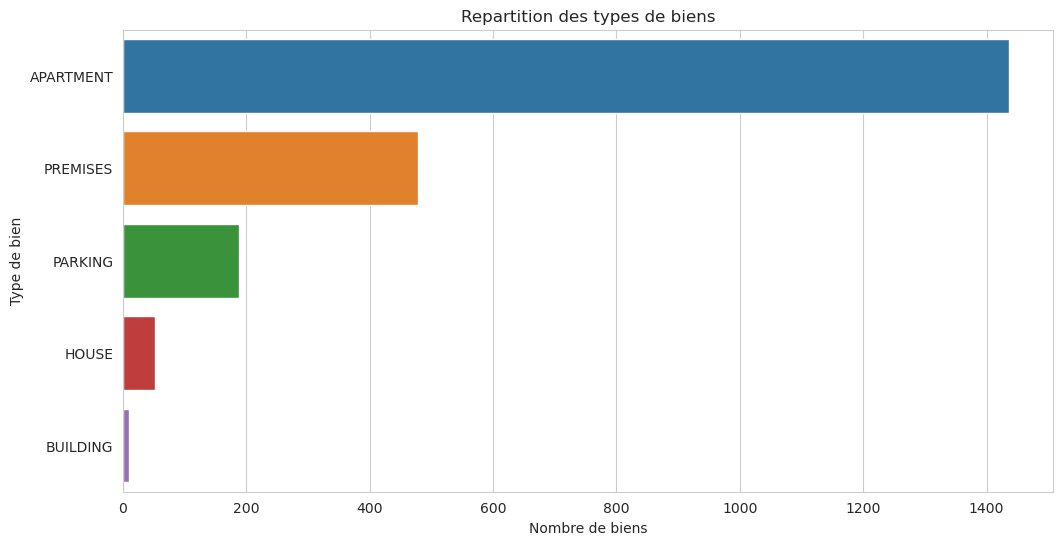

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='PROPERTY_TYPE', order=df['PROPERTY_TYPE'].value_counts().index)
plt.title('Repartition des types de biens')
plt.xlabel('Nombre de biens')
plt.ylabel('Type de bien')
plt.show()

La repartition des types de biens montre que la grande majorité des annonces à Levallois-Perret concernent des appartements, suivies de quelques annonces pour des maisons.

#### Repartition des annonces en fonction de leur source

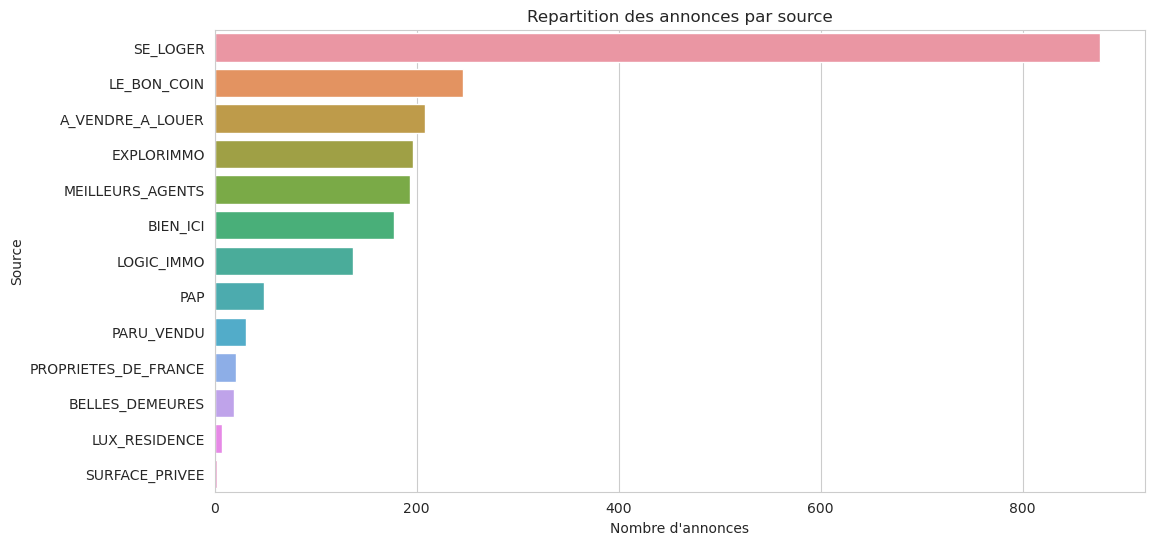

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='CRAWL_SOURCE', order=df['CRAWL_SOURCE'].value_counts().index)
plt.title('Repartition des annonces par source')
plt.xlabel('Nombre d\'annonces')
plt.ylabel('Source')
plt.show()


À Levallois-Perret, les annonces proviennent le plus souvent des portails "SeLoger", "LeBonCoin" ou encore "A vendre a louer"

---

<b>Cette phase exploratoire nous permet de comprendre un peu comment les données se présentent et nous permet d'avoir une idée sur comment identifier des biens similaires afin de pouvoir les regrouper ensuite pour faciliter le dedoublonnement.</b>

<div id="load"><h1> 4. Exploration des techniques de dedoublonnement par regroupement des données</h1></div>

Nous allons das cette partie explorer quelques techniques pour dedoublonner les annonces.

## Approche heuristique

---
### Methode 1
Nous pouvons considérer des propriétés comme des doublons si elles ont des attributs similaires, tels que la <span style='color:blue;'>surface</span>, le <span style='color:blue;'>nombre de pièces</span>, et le <span style='color:blue;'>type de propriété</span>.

Nous considérerons donc que deux propriétés sont des doublons si elles ont :

- Le même type de propriété (PROPERTY_TYPE)
- La même surface (ou une surface très proche, par exemple, dans une plage de ±5% pour tenir compte des erreurs de saisie ou des arrondis)
- Le même nombre de pièces (ROOM_COUNT)

In [41]:
# on va creer une colonne group_key qui sera un tuple (PROPERTY_TYPE, SURFACE, ROOM_COUNT) avec une marge de 10% pour la surface
def grouping_key(row):
    surface_range = (round(row['SURFACE'] * 0.9), round(row['SURFACE'] * 1.1))
    return (
        row['PROPERTY_TYPE'],
        surface_range,
        row['ROOM_COUNT']
    )


df['GROUP_KEY'] = df.apply(grouping_key, axis=1)

duplicate_groups = df.groupby('GROUP_KEY').filter(lambda x: len(x) > 1)


duplicate_groups.sort_values(by='GROUP_KEY').head(10)

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,FURNISHED,...,RENTAL_EXPENSES_INCLUDED,FEES_INCLUDED,EXCLUSIVE_MANDATE,OCCUPIED,DEALER_NAME,DEALER_TYPE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LOCALIZATION,GROUP_KEY
257,2d5f9bf0-c75c-11e9-92d3-cb429fb9e457,https://www.avendrealouer.fr/vente/levallois-p...,A_VENDRE_A_LOUER,APARTMENT,False,92300 LEVALLOIS-PERRET-SECTEUR RECHERCHE-BEAU ...,"[""https://cf-medias.avendrealouer.fr/image/_11...",9.0,1.0,False,...,True,False,False,False,Efficity,MANDATARY,2019-08-25 17:17:11.436,2019-08-25 17:17:11.436,Levallois-Perret (92300),"(APARTMENT, (8, 10), 1.0)"
1408,2a04c410-c74f-11e9-92d3-cb429fb9e457,https://www.paruvendu.fr/immobilier/vente/appa...,PARU_VENDU,APARTMENT,False,T1 92300 LEVALLOIS-PERRET-SECTEUR RECHERCHE-BE...,"[""https://pix.yanport.com/ads/2a04c410-c74f-11...",9.0,1.0,False,...,True,False,False,False,Efficity,MANDATARY,2019-08-25 15:44:01.063,2019-08-25 15:44:01.063,Levallois-Perret (92300),"(APARTMENT, (8, 10), 1.0)"
254,d05cd220-c73c-11e9-92d3-cb429fb9e457,https://www.seloger.com/annonces/achat/apparte...,SE_LOGER,APARTMENT,False,92300 LEVALLOIS-PERRET-SECTEUR RECHERCHE-BEAU ...,"[""https://v.seloger.com/s/width/800/visuels/0/...",9.0,1.0,False,...,True,False,False,False,Efficity,MANDATARY,2019-08-25 13:53:00.000,2019-08-25 13:32:40.642,Levallois-Perret (92300),"(APARTMENT, (8, 10), 1.0)"
253,2cc76880-c739-11e9-92d3-cb429fb9e457,https://www.leboncoin.fr/ventes_immobilieres/1...,LE_BON_COIN,APARTMENT,False,92300 LEVALLOIS-PERRET-SECTEUR RECHERCHE-BEAU ...,"[""https://pix.yanport.com/ads/2cc76880-c739-11...",9.0,1.0,False,...,True,False,False,False,M. Jean Philippe Blombo,AGENCY,2019-08-25 13:06:30.818,2019-08-25 13:06:30.818,Levallois-Perret (92300),"(APARTMENT, (8, 10), 1.0)"
155,d1a9f960-4c6b-11e9-ba7a-0ff7ef4fe44b,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,False,"louer une chambre à un étudiant 12 m², apparte...","[""https://pix.yanport.com/ads/d1a9f960-4c6b-11...",9.0,1.0,True,...,True,False,False,False,Indefini,PRIVATE,2019-03-21 19:14:20.362,2019-06-29 00:48:36.821,Levallois-Perret (92300),"(APARTMENT, (8, 10), 1.0)"
1166,594856d0-0931-11e7-a169-33011d0a7e82,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,Levallois-Perret Proche ParisDans une copropri...,[],9.0,1.0,False,...,True,False,False,False,Cabinet Vincent,AGENCY,2017-03-15 04:41:59.853,2017-04-14 17:27:00.273,Levallois-Perret (92300),"(APARTMENT, (8, 10), 1.0)"
1465,c903e840-a2a9-11e9-96d9-fb3253f8fc6c,https://www.leboncoin.fr/locations/1643720638.htm,LE_BON_COIN,APARTMENT,False,STUDETTE MEUBLEE de 10m²\nindépendante\n\nIDEA...,"[""https://img5.leboncoin.fr/ad-image/a87eb0d5c...",10.0,1.0,True,...,True,False,False,False,mariette,PRIVATE,2019-07-09 21:07:42.575,2019-07-25 02:14:53.772,Levallois-Perret (92300),"(APARTMENT, (9, 11), 1.0)"
365,53167e00-9cfe-11e9-a8e6-0de7b497e456,https://www.leboncoin.fr/locations/1640477724.htm,LE_BON_COIN,APARTMENT,False,"Bonjour, \nNous louons un studio plein centre ...","[""https://pix.yanport.com/ads/53167e00-9cfe-11...",10.0,1.0,True,...,True,False,False,False,Lmt,PRIVATE,2019-07-02 19:19:29.076,2019-07-18 02:13:30.175,Levallois-Perret (92300),"(APARTMENT, (9, 11), 1.0)"
1150,609f06c0-2832-11e7-8609-9b009f55330d,http://www.leboncoin.fr/locations/1125323518.h...,LE_BON_COIN,APARTMENT,False,Levallois Perret - Angle Louise Michel / Mariu...,"[""http://img1.leboncoin.fr/ad-image/6b507b0b3a...",10.0,1.0,True,...,True,False,False,False,Mattei,PRIVATE,2017-04-23 14:37:24.520,2017-05-08 09:41:15.052,Levallois-Perret (92300),"(APARTMENT, (9, 11), 1.0)"
40,618ef810-b9cb-11e9-81e9-5f24299f2ef3,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,False,Studio meublé Paris Levallois tout équipé (kit...,"[""https://pix.yanport.com/ads/618ef810-b9cb-11...",10.0,1.0,True,...,True,False,False,False,Indefini,PRIVATE,2019-08-08 10:57:53.161,2019-08-15 12:55:24.768,Levallois-Perre

In [42]:
duplicate_groups.shape

(1902, 28)

In [43]:
duplicate_groups.GROUP_KEY.value_counts()

(PARKING, (50, 61), 2.0)        78
(PARKING, (11, 13), 2.0)        40
(APARTMENT, (44, 54), 2.0)      33
(APARTMENT, (45, 55), 2.0)      32
(APARTMENT, (43, 53), 2.0)      24
                                ..
(PREMISES, (58, 70), 0.0)        2
(APARTMENT, (70, 85), 3.0)       2
(APARTMENT, (27, 34), 1.0)       2
(APARTMENT, (90, 110), 5.0)      2
(APARTMENT, (157, 192), 6.0)     2
Name: GROUP_KEY, Length: 307, dtype: int64

In [44]:
file_path = "./grouped1_dataset_levallois_perret.csv"
df.to_csv(file_path, index=False)


#### Interpretation

Avec cette premiere approche on obtient un regroupement plutot satisfaisant qui rassemble les biens ayant presque les memes propriétés (PROPERTY_TYPE, SURFACE, ROOM_COUNT). Cependant on peut avoir des incohérences.

On peut par exemple retrouver dans un groupe une meme plateforme apparaissant plusieurs fois car plusieurs biens possèdent a peu près les mêmes propriétés mentionnés sans pour autant que ce soit les mêmes.

On suppose pour cela qu'il y'a moins de chance de retrouver la même annonce sur la même plateforme plusieurs fois.

----
### Methode 2
Nous allons donc rajouter un second critére qui n'accepte qu'une seul occurence d'une plateforme dans un même groupe.

In [45]:
duplicate_groups2 = df.groupby(['GROUP_KEY', 'CRAWL_SOURCE']).first().reset_index()

group_counts = duplicate_groups2.groupby('GROUP_KEY').size()

# Supprimer les groupes avec un seul element
groups_to_keep = group_counts[group_counts > 1].index

duplicate_groups2 = duplicate_groups2[duplicate_groups2['GROUP_KEY'].isin(groups_to_keep)]


In [46]:
duplicate_groups2.shape

(919, 28)

In [47]:
duplicate_groups2.GROUP_KEY.value_counts()

(APARTMENT, (47, 57), 3.0)     10
(APARTMENT, (32, 40), 2.0)      9
(APARTMENT, (43, 53), 2.0)      9
(APARTMENT, (44, 54), 2.0)      9
(APARTMENT, (29, 35), 2.0)      9
                               ..
(APARTMENT, (78, 95), 4.0)      2
(APARTMENT, (76, 92), 4.0)      2
(APARTMENT, (73, 89), 3.0)      2
(APARTMENT, (25, 31), 2.0)      2
(APARTMENT, (83, 101), 4.0)     2
Name: GROUP_KEY, Length: 227, dtype: int64

In [48]:
duplicate_groups2[duplicate_groups2['GROUP_KEY']==('APARTMENT', (78, 95), 4.0)]

,GROUP_KEY,CRAWL_SOURCE,ID,URL,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,ROOM_COUNT,...,PRICE_EVENTS,RENTAL_EXPENSES_INCLUDED,FEES_INCLUDED,EXCLUSIVE_MANDATE,OCCUPIED,DEALER_NAME,DEALER_TYPE,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LOCALIZATION
676,"(APARTMENT, (78, 95), 4.0)",BIEN_ICI,8671d7c0-7c26-11e9-9d62-73a5c6d53b5c,https://www.bienici.com/annonce/era-282077,APARTMENT,False,"A Levallois-Perret, Vue TOUR EIFFEL.Excellente...","[""https://public.erafrance.com/assets/nas-era/...",86.37,4.0,...,"[{""price"":900000.0,""date"":""2019-05-22""},{""pric...",True,False,True,False,Era Immobilier Levallois,AGENCY,2019-05-21 05:38:19.358,2019-08-12 22:20:36.600,Levallois-Perret (92300)
677,"(APARTMENT, (78, 95), 4.0)",SE_LOGER,4e1edca0-7ba0-11e9-9f13-59cc875fff96,https://www.seloger.com/annonces/achat/apparte...,APARTMENT,False,"A Levallois-Perret, Vue Tour Eiffel. Excellent...","[""https://v.seloger.com/s/width/800/visuels/0/...",86.37,4.0,...,"[{""price"":900000.0,""date"":""2019-05-21""},{""pric...",True,False,False,False,Era Immobilier Levallois,AGENCY,2019-05-21 08:13:22.914,2019-08-10 16:42:19.403,Levallois-Perret (92300)


In [49]:
DESC = duplicate_groups2[duplicate_groups2['GROUP_KEY']==('APARTMENT', (78, 95), 4.0)].DESCRIPTION.to_list()
SOURCE = duplicate_groups2[duplicate_groups2['GROUP_KEY']==('APARTMENT', (78, 95), 4.0)].CRAWL_SOURCE.to_list()
for i in range(len(DESC)):
    print("DESCRIPTION ", i+1)
    print(DESC[i])
    print("--"*10)
    print("Source: ", SOURCE[i])
    print()
    print()

DESCRIPTION  1
A Levallois-Perret, Vue TOUR EIFFEL.Excellente localisation, à proximité immédiate de Paris, des commerces et des transports. En étage élevé d'une résidence semi récente, bien entretenue et sécurisée avec gardien. Venez découvrir ce bel appartement 4 pièces de 86,37 m². Il se compose d'un double séjour jouissant d'un grand balcon exposé sud ouest sur parc, offrant une vue panoramique sur la Tour Eiffel, d'une cuisine indépendante, de 2 chambres (possibilité d'une 3ème chambre) , d'une salle de bains, d'une salle de douche, d'un dressing, d'un wc séparé et de nombreux rangements. Traversant, très lumineux et ensoleillé, sans vis à vis, au calme. Appartement climatisé, parfaitement entretenu. Aucun travaux de copropriété à prévoir. 1 cave et 1 parking complètent ce bien.
--------------------
Source:  BIEN_ICI


DESCRIPTION  2
A Levallois-Perret, Vue Tour Eiffel. Excellente localisation, à proximité immédiate de Paris, des commerces et des transports. En étage élevé d'une r

---
#### Interpretation

On peut voir que ces deux annoncees sont les mêmes et qu'elles ont été faites dans deux sites différents (**BIEN_ICI**, **SE_LOGER**)

---

In [50]:
file_path = "./grouped2_dataset_levallois_perret.csv"
duplicate_groups2.to_csv(file_path, index=False)

### Visualisation Streamlit

Certaines images sont difficiles a recuperer via requests. Nous allons utiliser Streamlit pour les afficher dans une interface conviviale

In [ ]:
!pip install streamlit

![image](./captures/img1.png) ![image](./captures/img2.png) ![image](./captures/img3.png)

Pour tester par vous meme lancer le script stremlit avec les commandes suivantes:

```bash
cd streamlit_app

streamlit run streamlit_app.py
```

Puis se rendre sur [http://localhost:8501/](http://localhost:8501/)


Remarques: Ces resultats ont besoin d'une validation manuelle pour plus de sureté.

### Approche ML

Afin de pousser l'analyse un peu plus loin et espèrer de meilleur résultat on peut adopter des méthodes de Machine Learning pour voir les annonces similaires et ainsi efficacement regrouper voir aggreger sur une seul plateforme.

Parmi ces methodes on peut comparer les descriptions des annonces.
Concretement on peut soit entrainer un modèle sur les descriptions et ainsi faire un clustering (ex DBSCAN pour identifier des clusters de densités variées).

Cela dit vu la taille faible de nos données on ne peut pas espérer de meilleurs résultats.

Une solution pourrait être d'utiliser un modéle pré-entrainé sur huggingface par ex.